In [1]:
import os,sys,datetime,re,chardet,time,urllib2
import matplotlib.pyplot as plt
from jianfan import jtof
from os import walk
import matplotlib
import numpy as np
%matplotlib inline 
spark_home = os.environ.get('SPARK_HOME', None)
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.3-src.zip'))
execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.2
      /_/

Using Python version 2.7.11 (default, Dec  6 2015 18:57:58)
SparkSession available as 'spark'.


In [10]:
ori_files = []

for (dirpath, dirnames, filenames) in walk('../data/'):
    for filename in filenames:
        print dirpath + filename
        with open(dirpath + filename,'r') as f:
            _data = f.readlines()
            if len(_data) > 2:
                print chardet.detect(_data[2])['encoding']
                ori_files.append((_data,chardet.detect(_data[2])['encoding']))

../data/97家有喜事
utf-8
../data/功夫
utf-8
../data/唐伯虎秋香v2
utf-8
../data/唐伯虎點秋香v1
utf-8
../data/國產凌凌漆
utf-8
../data/少林足球
utf-8
../data/武狀元蘇乞兒
ascii
../data/逃學威龍
utf-8
../data/食神
utf-8
../data/鹿鼎記神龍教
utf-8


In [11]:
len(ori_files)

10

In [4]:
for line in ori_files[1][0]:
    line = line.strip()
    if line.isdigit():
        pass
    elif line.find('-->') > 0:
        pass
    elif len(line) == 0:
        pass
    else: 
        if chardet.detect(line)['encoding'] is not None:
            print line.decode(chardet.detect(line)['encoding']).encode("utf-8")

還有誰？
這麽漂亮的一個女人
就因為往地上吐了一口口水
就被你們給抓到這兒來
還有王法嗎？
還有法律嗎？
你們局長都得給我們鱷魚幫面子
要不然他就當不了這個局長
你他媽的不認識我？
對不起，我真的不知道她是你的太太
你還敢躲！
走！
看什麽看？ 沒見過這麽帥的老大？
我做什麽生意都不會做電影
星期天電影院一個人都沒有
車子呢？
回去！
叫人！
不用發了，下巴老
你打警察的時候
你的小弟已經全都被我搞定了
斧頭幫，我跟你拼了
慢著！慢著！
你還記得嗎？我還請你吃過飯呢
琛哥
大哥，你放過我吧
別傻了，大嫂
我不殺女人，你走吧
謝謝大哥
警察出來洗地了
1，2，3
苦力強，行不行啊？
行！
阿鬼，算帳
å”‰
多少錢？
送的，送的！
你可真懂事啊
謝了
小意思，小意思
我回去了，跟老婆商量一下
減你的租金
Thank you!
包租公，早
包租公！早
小朱，又長高了
來過來，叔叔給你檢查身體
包租公，這麽巧啊
巧什麽巧啊
別這樣…！
勝哥，這件衣服的叉我想開高點了
沒問題！
哎呀，有流星啊！
阿珍！你來真的？
哎呀包租公，你怎麽這樣啊？
阿珍…你別走啊，阿珍
再聊一會兒，來，別走啊你
阿珍
包租婆
包租婆！
為什麽突然之間沒水了呢？
水費不用花錢哪？你們這些混蛋
這個月房租也不交
還那麽多廢話說
但是我的頭洗到一半，你把水閘關了
我不光是現在關
從明天開始，逢一、三、五停水
二、四、六間歇性供水，怎樣？
斜眉歪眼，一個個鬼哭狼嚎什麽？
找死啊？
我看你們都活賦了！
Good morning , 包租婆！
果你媽個頭啊！
你今天要是再不交租的話
我就燒了你鋪子
笑，笑什麽啊？
笑就不用交租了，老屁眼
這麽有力氣，活該你一輩子做苦力
欠我幾個月租金
早上連招呼也不打一聲
累死你個王八蛋！
別以為你長得帥就不打你
餵，怎麽買粥買那麽久啊？
粥不是買回來了嗎
我剛才幫忙扶個老婆婆過馬路嘛
那你在這幹嘛？
我看看有沒有色鬼偷看人洗澡
六嬸，有沒有色鬼偷看你洗澡？
六嬸，無憑無據，你別亂指啊你
神經病，無憑無據
別鬧了！
叔叔，可不可以教我們踢球啊？
還踢球！
哪位剪頭？
我大哥
請坐
剪完！謝謝五毛錢
å“‡
很漂亮吧？
幹嘛剪那麽漂亮？
誰叫你剪的漂亮的？
找茬啊？
大哥，你別生氣
他是我朋友，讓我來跟他說
斧頭幫大哥，兩把斧頭你也親眼看到了
壞人哪
你把他頭剪那麽漂亮要死人的

In [12]:
with open('../input.csv', 'w+') as f:
    f.seek(0)
    for data,encoding in ori_files:
        for line in data:
            line = line.strip()
            if len(line) > 0:
                if line.isdigit():
                    pass
                elif line.find('-->') > 0:
                    pass
                else:
                    encoding = chardet.detect(line)['encoding']
                    if encoding is not None:
                        try:
                            f.write(line.decode(encoding).encode("utf-8") + '\n')
                        except:
                            pass
                    else:
                        pass
        print encoding
    f.truncate()

utf-8
utf-8
windows-1252
utf-8
utf-8
utf-8
ascii
utf-8
utf-8
utf-8


In [22]:
stop = {'0','1','2','3','4','5','6','7','8','9','-','+','\n'}   
def cuttext_by_server(text,stop_sc):
    retry = 3
    for _ in range(retry) :
        try:
            stop_word = stop_sc #= stop_sc.value
            url = 'http://localhost:11200'
            req = urllib2.Request(url, text.encode('utf8'))
            response = urllib2.urlopen(req,timeout=120)
            terms = response.read().split(" ")
            r = []
            for i in terms:
                if len(i) <=3 or i[0] in stop or i in stop_word: 
                    continue
                r.append(i)
            return r
        except :
            import sys
            print "Unexpected error:", sys.exc_info()
            time.sleep(1)
    return []

In [31]:
aa = cuttext_by_server(u'今天天氣很好想去淡水玩',{})
print aa

['\xe4\xbb\x8a\xe5\xa4\xa9', '\xe5\xa4\xa9\xe6\xb0\xa3', '\xe6\xb7\xa1\xe6\xb0\xb4']


In [32]:
aaaa = []
count = 0
fw = open('cut_result.csv','w+')
with open('../input.csv', 'r') as f:
    for line in f:
        count = count + 1
        try:
            fw.write(' '.join(cuttext_by_server(unicode(line, 'utf-8'), {})) + '\n')
            if not count % 1000:
                print '完成1000筆'
        except:
            aaaa.append(line)
fw.close()

完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆
完成1000筆


In [33]:
len(aaaa)

0

In [34]:
import re
import itertools
import shutil
from textblob import TextBlob
from textblob import WordList
import time
from nltk.corpus import wordnet as wn
import nltk
import random
from keras.preprocessing import sequence
from keras.datasets import imdb
import sys
import string

Using TensorFlow backend.


In [106]:
vocabulary_size = 10000
unknown_token = "UNKNOWN_TOKEN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"
number_of_iterations = 20 #max number of iterations/epochs you want to run for. 
start_validating_at_iteration = 0 #which iteration to start checking for overfitting
patience = 10 #number of times where validation loss has to rise before quitting algorithm
hidden_variables = 256 #number of hidden variables in all layers, keep this betwen 256 and 512
dropout = 0.5 #the dropout between each layer -- recommendation is 0.5
embedding_size = 128 #this should be 128 or 256 or 512
hidden_size = 128
batch_size = 1024
decoder_layers = 3 #number of lstm layers for decoding -- try 4, maybe eventually up to 8. 
time_steps = 20 #number to pad the vector by. Should be the max number of words in a sentence.

In [107]:
with open("cut_result.csv",'r') as f:
    _data = f.readlines()

In [108]:
data = []
for each in _data[:100000]:
    each = each.decode('utf-8')
    each = each.strip()
    if len(each) > 0:
        data.append(each)

In [109]:
data = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in data]

In [110]:
tokenized_sentences = [each.split() for each in data]

In [111]:
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))

In [112]:
print ("Found %d unique words tokens." % len(word_freq.items()))

Found 13004 unique words tokens.


In [113]:
vocabulary_size

10000

In [114]:
vocab = word_freq.most_common(vocabulary_size-1)

In [115]:
index_to_word = ['padzero']

In [116]:
sentences = data

In [117]:
print('Building model...')

increased_vocab = (int(len(vocab))+2+1)

print ('the increased vocab is')
print increased_vocab

Building model...
the increased vocab is
10002


In [137]:
for x in vocab:
    index_to_word.append(x[0]) #this is based upon frequency of word used -- nice

index_to_word.append(unknown_token) #this is making the word for all unknown words here
print '-----------------------------------------------------------------------------------------------'
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
print
print

print ("Using vocabulary size %d." % vocabulary_size)
print ("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))
 
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]
print ("\nExample sentence: '%s'" % sentences[0])

print ("\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[0])

-----------------------------------------------------------------------------------------------


Using vocabulary size 10000.
The least frequent word in our vocabulary is '宣佈' and appeared 1 times.

Example sentence: 'SENTENCE_START 白粥 油條 公公 SENTENCE_END'

Example sentence after Pre-processing: '[u'SENTENCE_START', u'\u767d\u7ca5', 'UNKNOWN_TOKEN', 'UNKNOWN_TOKEN', u'SENTENCE_END']'


In [119]:
encoder_input_array = ([[word_to_index[w] for w in sent] for sent in tokenized_sentences[1:-1]])
#the ::-1 is to reverse the list
encoder_input = sequence.pad_sequences(encoder_input_array, maxlen=time_steps)


decoder_prev_array = ([[word_to_index[w] for w in sent] for sent in tokenized_sentences[:-1]])[:-1]
decoder_prev_input = sequence.pad_sequences(decoder_prev_array, maxlen=time_steps)

decoder_prev_target_array = ([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences[:-1]])[:-1]
decoder_prev_target = sequence.pad_sequences(decoder_prev_target_array, maxlen=time_steps)


decoder_next_array = ([[word_to_index[w] for w in sent] for sent in tokenized_sentences[1:]])[1:]
decoder_next_input = sequence.pad_sequences(decoder_next_array, maxlen=time_steps)

decoder_next_target_array = ([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences[1:]])[1:]
decoder_next_target = sequence.pad_sequences(decoder_next_target_array, maxlen=time_steps)
print '* '*50

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


In [120]:
T = 9000

In [121]:

print encoder_input[T]
for each in encoder_input[T]:
    print index_to_word[each],


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1 2382   15    2]
padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero SENTENCE_START 總該 知道 SENTENCE_END


In [122]:
print decoder_prev_input[T]
for each in decoder_prev_input[T]:
    print index_to_word[each],

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1 1539 3141    2]
padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero SENTENCE_START many questions SENTENCE_END


In [123]:
print decoder_next_target[T]
for each in decoder_next_target[T]:
    print index_to_word[each],

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   74  113 3783    2]
padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero padzero should know reason SENTENCE_END


In [124]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display

from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

In [125]:
from keras.models import Sequential, Model
from keras.layers import Input, merge
from keras.layers.core import Activation, TimeDistributedDense, RepeatVector, Dropout, Dense, Reshape, Lambda
from keras.layers.recurrent import LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
import numpy as np
import random, sys
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.layers import TimeDistributed
from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.layers.convolutional import Cropping1D

In [126]:
#tensorboard = TensorBoard(log_dir="./logs")
early_stopping = EarlyStopping(monitor='loss', patience=patience)

In [127]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, clipvalue=0.5)

In [138]:
hidden_size

128

In [129]:
aa = np.array([[1,1],[2,2]])
bb = np.array([[1,2],[3,4],[5,6],[7,8]])
bb.shape

(4, 2)

In [130]:
np.vstack((aa,bb))[:-1]

array([[1, 1],
       [2, 2],
       [1, 2],
       [3, 4],
       [5, 6]])

In [142]:
shared_embedding_layer

In [132]:
main_input = Input(shape=(20,))


decoder_prev_inputs = Input(shape=(20,), name='decoder_prev_input')
decoder_next_inputs = Input(shape=(20,), name='decoder_next_input')

embedding = np.random.random((increased_vocab, embedding_size))
shared_embedding_layer = Embedding(increased_vocab, embedding_size, input_length=time_steps,
                                   mask_zero=True,weights=[embedding])

shared_embedding_layer_unmask = Embedding(increased_vocab, embedding_size, input_length=time_steps,
                                   mask_zero=False,weights=[embedding])

main_embd = shared_embedding_layer(main_input)
prev_embd = shared_embedding_layer(decoder_prev_inputs)
next_embd = shared_embedding_layer(decoder_next_inputs)



encoder = GRU(hidden_size, activation='relu', return_sequences=False,
                                  W_regularizer=l1(0.5) )(main_embd)
encoder = Reshape((1,hidden_size))(encoder)

#prev_embd = Reshape((1, 5120))(prev_embd)
#next_embd = Reshape((1, 5120))(next_embd)
#prev_crop = Cropping1D(cropping=(1, 256))(prev_embd)

#prev_embd = Reshape((20, 256))(prev_crop)
#next_embd = Reshape((20, 256))(next_embd)

#prev_embd = Lambda(lambda x,: x[1:], output_shape=(19,256))(prev_embd)
#next_embd = Lambda(lambda x,: x[1:], output_shape=(19,256))(next_embd)

x_prev = merge([encoder, prev_embd],  mode=lambda x: x[0] - x[1], output_shape=(21,hidden_size))
x_next = merge([encoder, next_embd], mode=lambda x: x[0] - x[1], output_shape=(21,hidden_size))

decoder_prev = GRU(hidden_size, activation='relu', return_sequences=False,  W_regularizer=l1(0.5))(x_prev)
decoder_next = GRU(hidden_size, activation='relu', return_sequences=False,  W_regularizer=l1(0.5))(x_next)

decoder_prev_outputs = Dense(output_dim=20, activation="softmax")(decoder_prev)
decoder_next_outputs = Dense(output_dim=20, activation="softmax")(decoder_next)


sequence_autoencoder = Model(input=[main_input,decoder_prev_inputs, decoder_next_inputs], output=[decoder_prev_outputs, decoder_next_outputs])

sequence_autoencoder.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


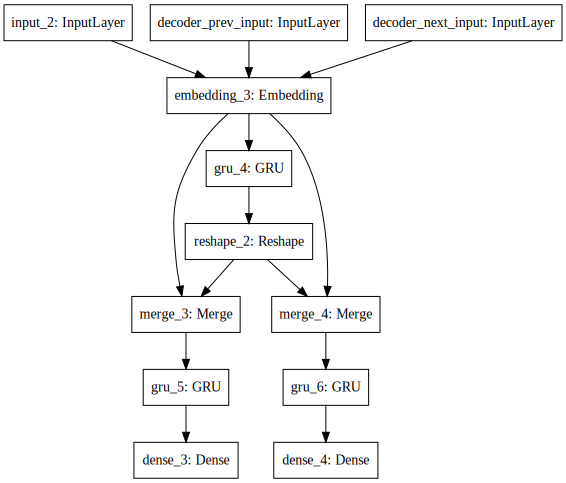

In [133]:
display(SVG(model_to_dot(sequence_autoencoder).create(prog='dot', format='svg')))

In [134]:
display(sequence_autoencoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 20)            0                                            
____________________________________________________________________________________________________
decoder_prev_input (InputLayer)  (None, 20)            0                                            
____________________________________________________________________________________________________
decoder_next_input (InputLayer)  (None, 20)            0                                            
____________________________________________________________________________________________________
embedding_3 (Embedding)          (None, 20, 128)       1280256     input_2[0][0]                    
                                                                   decoder_prev_input[0][0]

None

In [162]:
decoder_next_target.shape

(14584, 20)

In [136]:
#sequence_autoencoder.fit(X_train, X_train, nb_epoch=100,
#                         batch_size=batch_size, 
#                         shuffle=True, 
#                         validation_split=0.2,
#                         callbacks=[early_stopping])
sequence_autoencoder.fit([encoder_input, decoder_prev_input, decoder_next_input], 
                          [decoder_prev_target, decoder_next_target], nb_epoch=10,
                         batch_size=batch_size, 
                         shuffle=True, 
                         validation_split=0.2,
                         callbacks=[early_stopping],
                         verbose=2)

Train on 11667 samples, validate on 2917 samples
Epoch 1/10


InvalidArgumentError: Input to reshape is a tensor with 2621440 values, but the requested shape requires a multiple of 2688
	 [[Node: Reshape_37 = Reshape[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](add_122, pack_17)]]
Caused by op u'Reshape_37', defined at:
  File "/Users/wayne/anaconda2/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/wayne/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-132-3a80c42cd07a>", line 38, in <module>
    decoder_next = GRU(hidden_size, activation='relu', return_sequences=False,  W_regularizer=l1(0.5))(x_next)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 517, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 571, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 155, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/layers/recurrent.py", line 219, in call
    preprocessed_input = self.preprocess_input(x)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/layers/recurrent.py", line 545, in preprocess_input
    input_dim, self.output_dim, timesteps)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/layers/recurrent.py", line 35, in time_distributed_dense
    x = K.reshape(x, K.pack([-1, timesteps, output_dim]))
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 759, in reshape
    return tf.reshape(x, shape)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1383, in reshape
    name=name)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/op_def_library.py", line 704, in apply_op
    op_def=op_def)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/wayne/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


In [145]:
1280256 /128

10002

In [146]:
98688/2580

38

In [148]:
2621440/2580

1016

In [151]:
2688/128.0

21.0

In [152]:
2580/128.0

20.15625

In [154]:
2580/20.0

129.0

In [156]:
2688/128.0

21.0

In [158]:
14584*20

291680